<a href="https://colab.research.google.com/github/dev02chandan/ATML/blob/main/GANs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A.1 Aim: To implement Generative Adversarial Network (GAN).

## Task 1: load the fashion mnist dataset available in keras.

· Normalize the dataset to the range (-1,1).

· Reshape the data so that one sample at a time can be given as input to the network.

· Plot some sample data from the dataset using matplotlib.

· Choose a batch size of 32.

· Using tensor flow and from_tensor_slices, slice the dataset into batches of 32.

##Task 2: Build a generator network

· Build a sequential generator network

· You can start with any number of neurons in the hidden layer.

· Choose appropriate layers, activation function, momentum etc.

· The input shape will be dependent on noise given as input to the generator.

· Reshape the output of generator to (28,28,1).

## Task 3: Build a discriminator network.

· Build a sequential discriminator network.

· The input shape would be (28,28,1)

· Choose appropriate layers, activation function etc.

· The final layer will have one neuron and sigmoid activation.

##Task 4: Build a GAN network

· Build a sequential GAN network using the generator and discriminator

· Choose appropriate optimizer and compile the model.

· Run the model and plot the generated images.

· Change the number of epochs and note the difference in the quality of images generated.

## Task 1: Data Preperation

In [2]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Dense, Flatten, Reshape, LeakyReLU, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [3]:
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

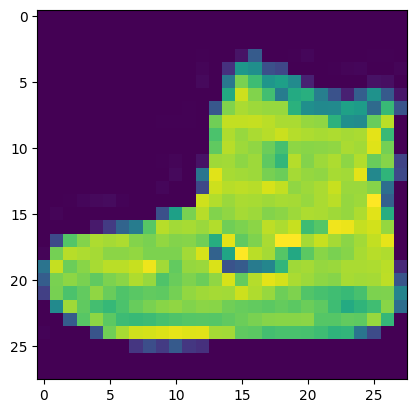

In [4]:
plt.imshow(x_train[0])

In [5]:
x_train_normalised = (x_train.astype(np.float32) - 127.5) / 127.5

In [6]:
x_test_normalised = (x_test.astype(np.float32) - 127.5) / 127.5

In [7]:
print("Original x_train shape:", x_train.shape)
print("Normalized x_train shape:", x_train_normalised.shape)
print("Original x_train min and max:", np.min(x_train), np.max(x_train))
print("Normalized x_train min and max:", np.min(x_train_normalised), np.max(x_train_normalised))

Original x_train shape: (60000, 28, 28)
Normalized x_train shape: (60000, 28, 28)
Original x_train min and max: 0 255
Normalized x_train min and max: -1.0 1.0


In [8]:
x_train_flat = x_train_normalised.reshape(x_train_normalised.shape[0], -1)
x_test_flat = x_test_normalised.reshape(x_test_normalised.shape[0], -1)
# The -1 in the reshape function automatically calculates the appropriate size along the second dimension,
# ensuring that the total number of elements remains the same.

In [9]:
print("Original x_train shape:", x_train_normalised.shape)
print("Flattened x_train shape:", x_train_flat.shape)
print("Original x_test shape:", x_test_normalised.shape)
print("Flattened x_test shape:", x_test_flat.shape)

Original x_train shape: (60000, 28, 28)
Flattened x_train shape: (60000, 784)
Original x_test shape: (10000, 28, 28)
Flattened x_test shape: (10000, 784)


In [10]:
x_train_normalised.shape[0]

60000

In [11]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train_flat, y_train))

In [12]:
batch_size = 32

In [13]:
train_dataset = train_dataset.shuffle(buffer_size = len(x_train_flat))

In [14]:
train_dataset = train_dataset.batch(batch_size)

In [15]:
train_dataset = train_dataset.prefetch(buffer_size = tf.data.experimental.AUTOTUNE)

In [16]:
for batch_data, batch_labels in train_dataset.take(1):
    print("Batch Data Shape:", batch_data.shape)
    print("Batch Labels Shape:", batch_labels.shape)

Batch Data Shape: (32, 784)
Batch Labels Shape: (32,)


In [17]:
len(train_dataset)

1875

## Task 2: Building Generator

In [18]:
from tensorflow.keras.layers import Dense, Input, ReLU, Reshape
from tensorflow.keras import Sequential

In [19]:
generator = Sequential()
# The input shape will depend on the noise given as input to the generator
# let's assume the noise vector size is 100.

input_shape = (100,)

generator.add(Dense(128, input_shape = input_shape))
generator.add(ReLU())
generator.add(Dense(28 * 28 * 1, activation='tanh'))
generator.add(Reshape((28,28,1)))

generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               12928     
                                                                 
 re_lu (ReLU)                (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 784)               101136    
                                                                 
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
Total params: 114064 (445.56 KB)
Trainable params: 114064 (445.56 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Task 3: Build the Discriminator

In [20]:
from tensorflow.keras.layers import Conv2D, LeakyReLU, Flatten

In [21]:
discriminator = Sequential()

input_shape = (28, 28, 1)

discriminator.add(Conv2D(64, (3,3), strides=(2,2), padding='same'))
discriminator.add(LeakyReLU(alpha=0.2))
discriminator.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
discriminator.add(LeakyReLU(alpha=0.2))

discriminator.add(Flatten())
discriminator.add(Dense(1, activation='sigmoid'))

In [22]:
discriminator.compile(loss='binary_crossentropy', optimizer='adam')

## Task 4: Build a GAN

In [23]:
from tensorflow.keras import Model

In [24]:
discriminator.trainable = False

In [25]:
gan_input = Input(shape=(100,))

In [26]:
x = generator(gan_input)
gan_output = discriminator(x)
gan = Model(gan_input, gan_output)

In [27]:
gan.compile(loss='binary_crossentropy', optimizer='adam')

In [28]:
epochs = 10

In [29]:
batch_data.shape

TensorShape([32, 784])

In [ ]:
for epoch in range(epochs):
    for batch_data, _ in train_dataset:

        noise = np.random.normal(0, 1, (batch_data.shape[0], 100))

        batch_data = tf.reshape(batch_data, (batch_data.shape[0], 28, 28, 1))

        # Generate fake images using the generator
        generated_images = generator.predict(noise)

        # Labels for real and fake images
        labels_real = np.ones((batch_data.shape[0], 1))
        labels_fake = np.zeros((batch_data.shape[0], 1))

        # Train the discriminator
        d_loss_real = discriminator.train_on_batch(batch_data, labels_real, verbose=0)
        d_loss_fake = discriminator.train_on_batch(generated_images, labels_fake, verbose=0)

        # Train the generator
        noise = np.random.normal(0, 1, (batch_data.shape[0], 100))
        labels_gan = np.ones((batch_data.shape[0], 1))
        g_loss = gan.train_on_batch(noise, labels_gan)

    # Print the progress
    print(f"Epoch {epoch + 1}/{epochs} - \
    D loss: {0.5 * np.add(d_loss_real, d_loss_fake)}, \
    G loss: {g_loss}")

    # Generate and save a sample of generated generated_images
    if (epoch + 1) % 10 == 0:

        noise = np.random.normal(0, 1, (25, 100))
        generated_images = generator.predict(noise)
        generated_images = 0.5 * generated_images + 0.5
        # scale images back to [0, 1]

        plt.figure(figsize = (5,5))

        for i in range(25):
            plt.subplot(5, 5, i+1)
            plt.imshow(generated_images[i].reshape(28,28), cmap='gray')
            plt.axis('off')

        plt.savefig(f"gan_generated_image_epoch_{epoch + 1}.png")
        plt.show()

    # Add a condition to exit the loop after 50 epochs
    if epoch + 1 == 50:
        break

tf.get_logger().setLevel('ERROR')


1/1 [==============================] - 0s 17ms/step
Epoch 1/10 -     D loss: 0.3799421638250351,     G loss: 5.117956161499023
1/1 [==============================] - 0s 16ms/step
Epoch 2/10 -     D loss: 0.14464927464723587,     G loss: 3.5969972610473633
1/1 [==============================] - ETA: 0s

Above process took a lot of time, and did not complete training, hence optimisation is performed and the models are also changed.

## Optimisation

In [3]:
# Load and preprocess the dataset
(train_images, _), (_, _) = fashion_mnist.load_data()
train_images = (train_images.astype('float32') - 127.5) / 127.5
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
batch_size = 32
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(60000).batch(batch_size)

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
# Task 2: Build a generator network
def build_generator(noise_dim=100):
    model = Sequential([
        Dense(128, input_dim=noise_dim),
        LeakyReLU(0.2),
        BatchNormalization(momentum=0.8),
        Dense(256),
        LeakyReLU(0.2),
        BatchNormalization(momentum=0.8),
        Dense(512),
        LeakyReLU(0.2),
        BatchNormalization(momentum=0.8),
        Dense(28 * 28 * 1, activation='tanh'),
        Reshape((28, 28, 1))
    ])
    return model

In [5]:
# Task 3: Build a discriminator network
def build_discriminator():
    model = Sequential([
        Flatten(input_shape=(28, 28, 1)),
        Dense(512),
        LeakyReLU(0.2),
        Dense(256),
        LeakyReLU(0.2),
        Dense(1, activation='sigmoid')
    ])
    return model

In [6]:
# Instantiate models
generator = build_generator()
discriminator = build_discriminator()

In [7]:
# Compile the discriminator
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])

In [8]:
# For the combined model we will only train the generator
discriminator.trainable = False

In [9]:
# The generator takes noise as input and generates imgs
z = tf.keras.Input(shape=(100,))
img = generator(z)

In [10]:
# The discriminator takes generated images as input and determines validity
validity = discriminator(img)

In [11]:
# The combined model (stacked generator and discriminator)
# Trains the generator to fool the discriminator
combined = tf.keras.Model(z, validity)
combined.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

In [12]:
# Task 4: Build a GAN network and train
epochs = 3000
sample_interval = 500
noise_dim = 100

In [15]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # or any {'0', '1', '2'}

1/1 [==============================] - 0s 25ms/step
Epoch 1/3000 -         D loss: [0.01199962 1.        ],         G loss: 4.13389778137207
1/1 [==============================] - 0s 22ms/step


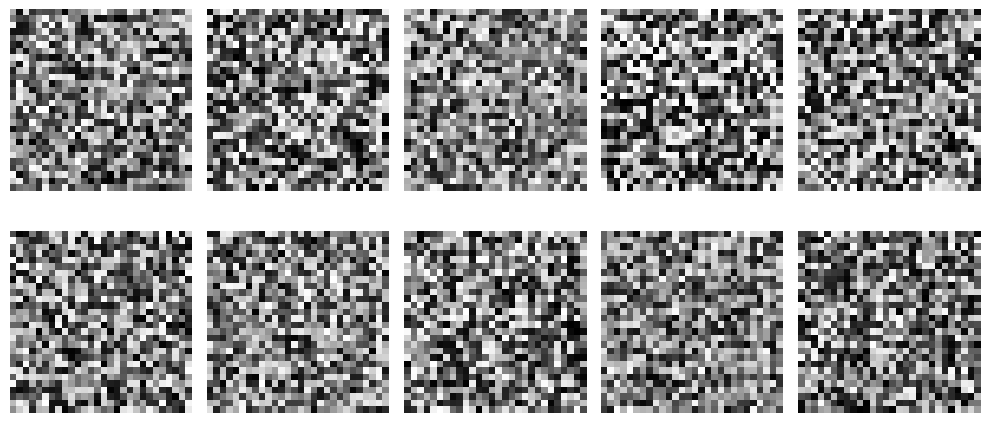

1/1 [==============================] - 0s 25ms/step
Epoch 501/3000 -         D loss: [0.51211394 0.828125  ],         G loss: 1.2009084224700928
1/1 [==============================] - 0s 25ms/step


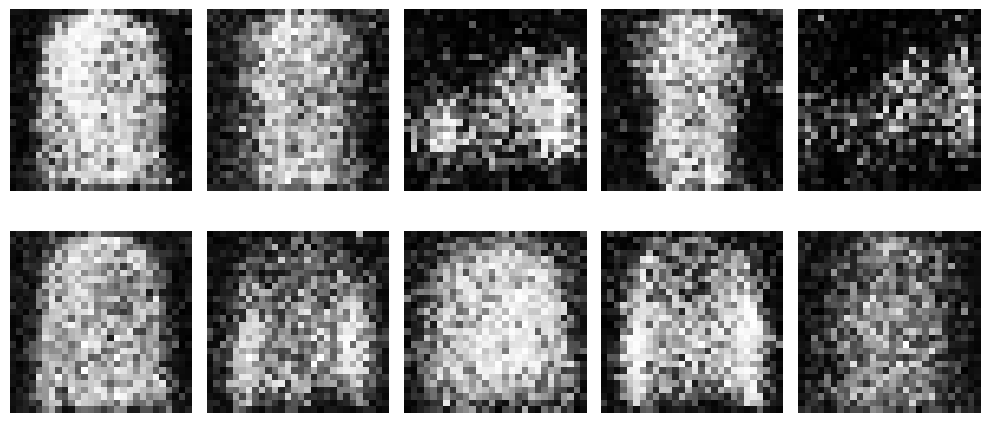

1/1 [==============================] - 0s 38ms/step
Epoch 1001/3000 -         D loss: [0.54505172 0.765625  ],         G loss: 1.199045181274414
1/1 [==============================] - 0s 48ms/step


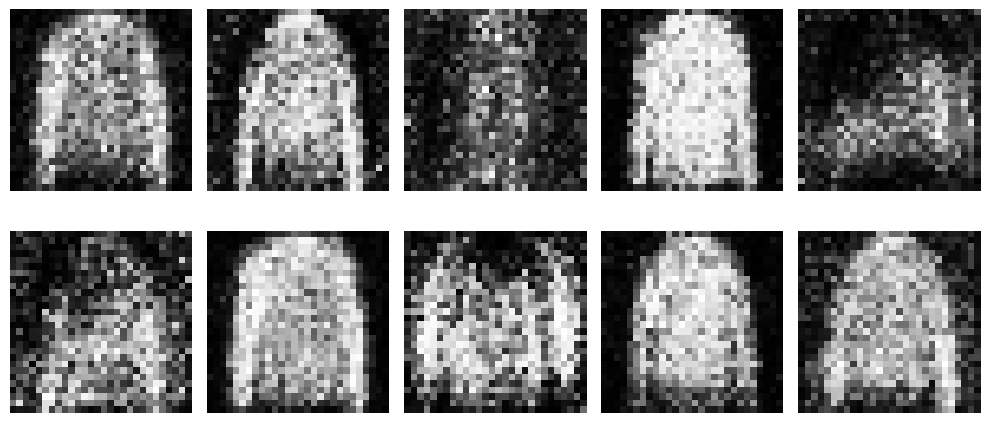

1/1 [==============================] - 0s 22ms/step
Epoch 1501/3000 -         D loss: [0.54974449 0.75      ],         G loss: 1.1000257730484009
1/1 [==============================] - 0s 42ms/step


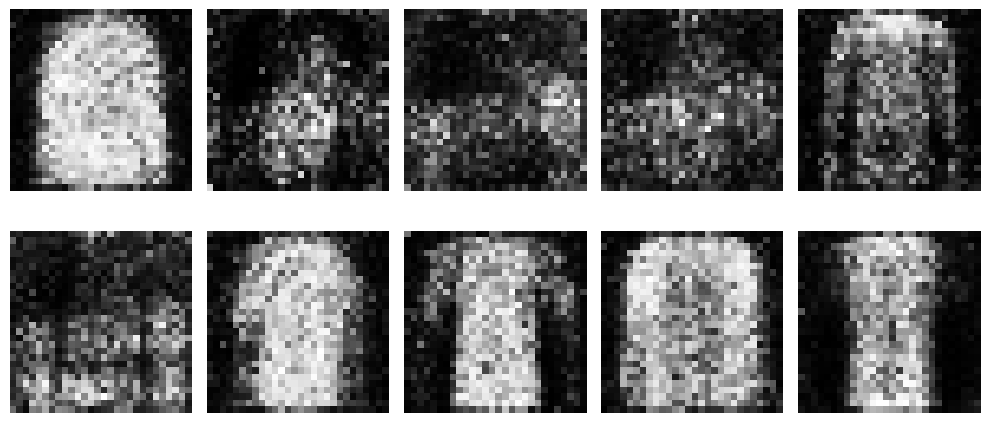

1/1 [==============================] - 0s 46ms/step
Epoch 2001/3000 -         D loss: [0.61758652 0.6875    ],         G loss: 1.046958565711975
1/1 [==============================] - 0s 48ms/step


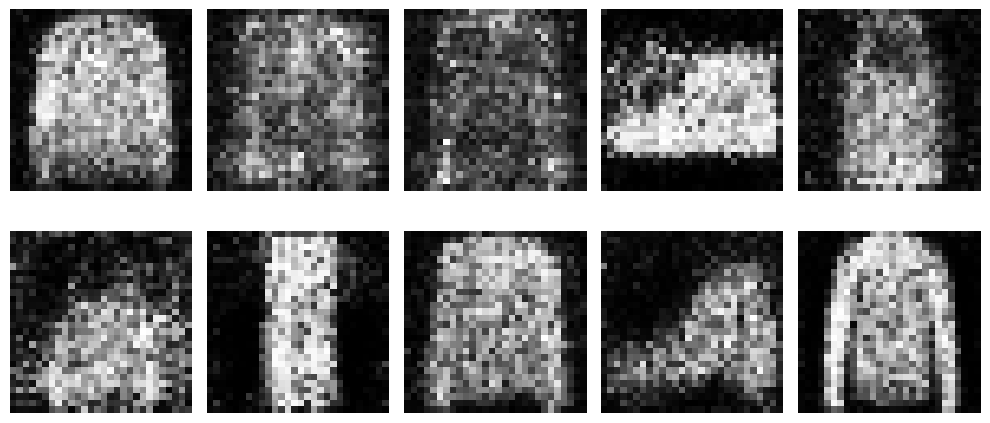

1/1 [==============================] - 0s 24ms/step
Epoch 2501/3000 -         D loss: [0.54557222 0.71875   ],         G loss: 1.0623536109924316
1/1 [==============================] - 0s 25ms/step


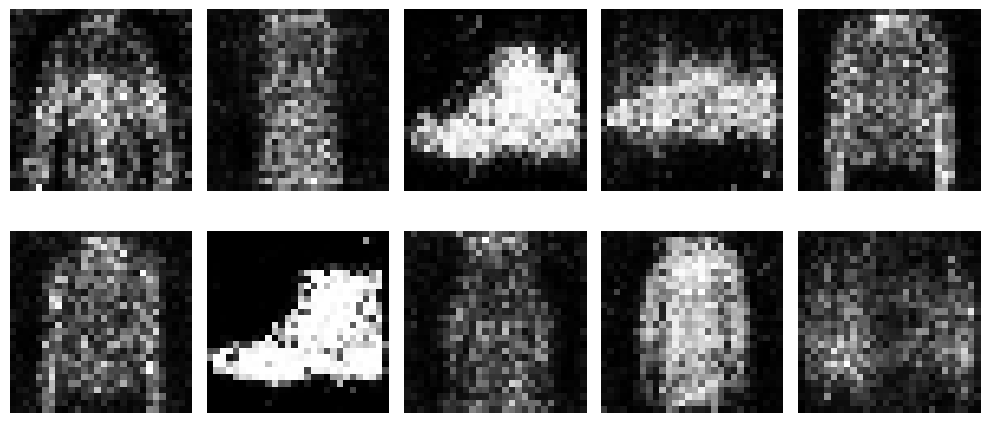

1/1 [==============================] - 0s 27ms/step


In [18]:
for epoch in range(epochs):
    # Train Discriminator
    idx = np.random.randint(0, train_images.shape[0], batch_size)
    imgs = train_images[idx]
    noise = np.random.normal(0, 1, (batch_size, noise_dim))
    gen_imgs = generator.predict(noise)
    d_loss_real = discriminator.train_on_batch(imgs, np.ones((batch_size, 1)))
    d_loss_fake = discriminator.train_on_batch(gen_imgs, np.zeros((batch_size, 1)))

    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train Generator
    noise = np.random.normal(0, 1, (batch_size, noise_dim))
    valid_y = np.array([1] * batch_size)
    g_loss = combined.train_on_batch(noise, valid_y)

    # If at save interval => save generated image samples
    if epoch % sample_interval == 0:

        print(f"Epoch {epoch + 1}/{epochs} - \
        D loss: {0.5 * np.add(d_loss_real, d_loss_fake)}, \
        G loss: {g_loss}")

        noise = np.random.normal(0, 1, (10, noise_dim))
        gen_imgs = generator.predict(noise)
        plt.figure(figsize=(10, 5))
        for i in range(10):
            plt.subplot(2, 5, i + 1)
            plt.imshow(gen_imgs[i].reshape(28, 28), cmap='gray')
            plt.axis('off')
        plt.tight_layout()
        plt.show()

1/1 [==============================] - 0s 42ms/step


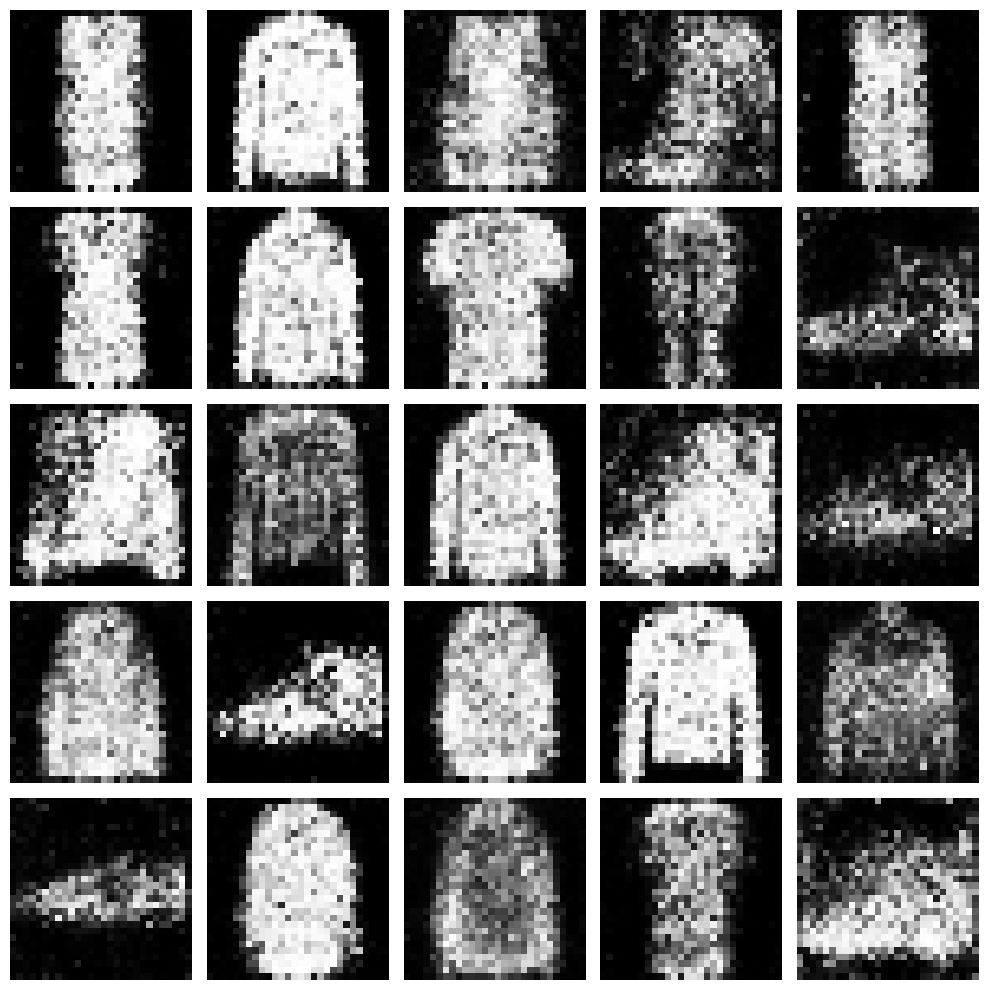

In [19]:
def visualize_results(generator, noise_dim=100):
    r, c = 5, 5  # Rows and columns for visualization
    noise = np.random.normal(0, 1, (r * c, noise_dim))
    gen_imgs = generator.predict(noise)

    # Rescale images from (-1, 1) to (0, 1)
    gen_imgs = 0.5 * gen_imgs + 0.5

    plt.figure(figsize=(10, 10))
    for i in range(r * c):
        plt.subplot(r, c, i + 1)
        plt.imshow(gen_imgs[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

visualize_results(generator)


# Conclusion

In this experiment, we implemented a Generative Adversarial Network (GAN) to generate images similar to the Fashion MNIST dataset. The GAN consists of two primary components: the generator and the discriminator.

The generator attempts to produce fake images from random noise, while the discriminator tries to distinguish between real images from the dataset and fake images produced by the generator. Over time, the generator gets better at producing more realistic images, while the discriminator gets better at telling real from fake.

After training the GAN for a specified number of epochs, we observed that the generated images became increasingly similar to the real Fashion MNIST images, showcasing the power of GANs in generating data that closely resembles real data. However, GANs require careful tuning and monitoring during training to ensure stable and meaningful results. Adjusting parameters like the learning rate, optimizer, and model architecture can lead to different outcomes and potentially improve the quality of generated images.

In future work, advanced GAN architectures and techniques could be explored to further enhance the quality and diversity of generated images.